# Machine Learning Coursework: Temperature Prediction



> BSc Computer Science 33680787 Seonjoo Hwang



# Workflow
1. Problem Definition
2. Data Collection and Inspection
3. Data Preprocessing and Visualisation
4. Model Selection and Training

  4-1. Regression

  4-2. Classification

5. Evaluation
6. Optimimal Threshold
7. Feature Importance
8. Conclusion









---




# 1. Problem Definition


**The Goal**

: To develop a machine learning model to predict oral temperatures using demographic information, environmental conditions, and various temperature readings from infrared images.

**Regression Tasks:**

Predict aveOralF (average oral temperature in fast mode).

Predict aveOralM (average oral temperature in monitor mode).

**Classification Tasks:**

Predict whether aveOralF is 37.5°C or higher (indicating fever).

Predict whether aveOralM is 37.5°C or higher (indicating fever).


---



# 2. Data Collection

The dataset is from a paper [1]'Infrared Thermography for Measuring Elevated Body Temperature: Clinical Accuracy, Calibration, and Evaluation' of [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset).


According to [1], "Body temperature can be measured at different body sites. These measurements can be used to impute here this means to predict temperatures at other body sites that are more meaningful, but less convenient to access".


---


[1]Wang, Quanzeng et al. “Infrared Thermography for Measuring Elevated Body Temperature: Clinical Accuracy, Calibration, and Evaluation.” Sensors (Basel, Switzerland) 22 (2021): n. pag.


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# Data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

#  # Metadata
print(infrared_thermography_temperature.metadata)
# # # Variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO



---



# 3. Data Exploration and Preprocessing

# Exploratory Data Analysis (EDA)

After printing metadata and variables, I found out


**Categorical Features**: Gender, Age, Ethnicity

**Continuous Features**: T_atm, Humidity, Distance, T_offset1, and multiple temperature readings.


**Target Variables**:

**aveOralF**: Oral temperature measured in fast mode

**aveOralM**: Oral temperature measured in monitor mode


In [ ]:
# Inspect the data
print("Features shape:", X.shape)
print("Targets shape:", y.shape)
print("Feature columns:\n", X.columns)
print("Target columns:\n", y.columns)
X.head()

Features shape: (1020, 33)
Targets shape: (1020, 2)
Feature columns:
 Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1'],
      dtype='object')
Target columns:
 Index(['aveOralF', 'aveOralM'], dtype='object')


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [ ]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing values in each feature:\n", missing_values)

Missing values in each feature:
 Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


In [ ]:
# Found 2 missing values in Distance column
mean_distance = X['Distance'].mean()
X['Distance'].fillna(mean_distance, inplace=True)

# Verify that there are no missing values
missing_values_after_imputation = X.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


<ipython-input-253-c63790b42879>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Distance'].fillna(mean_distance, inplace=True)


In [ ]:
# Descriptive statistics
X_describe = X.describe()
print("Descriptive statistics:\n", X_describe)

Descriptive statistics:
              T_atm     Humidity     Distance    T_offset1    Max1R13_1  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean     24.115392    28.723039     0.729784     0.968648    35.596533   
std       1.336338    13.071627     2.454074     0.362587     0.574888   
min      20.200000     9.900000     0.540000    -0.590000    33.897500   
25%      23.400000    17.600000     0.600000     0.772500    35.247500   
50%      24.000000    26.300000     0.620000     0.940000    35.548750   
75%      24.700000    36.200000     0.700000     1.140000    35.872500   
max      29.100000    61.200000    79.000000     2.875000    38.405000   

         Max1L13_1  aveAllR13_1  aveAllL13_1        T_RC1    T_RC_Dry1  ...  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000  ...   
mean     35.611474    34.888475    35.011345    35.659921    35.587143  ...   
std       0.549760     0.718613     0.633836     0.553897     0.569278 

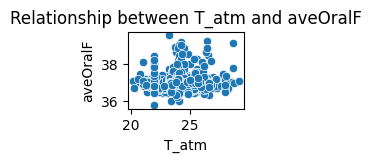

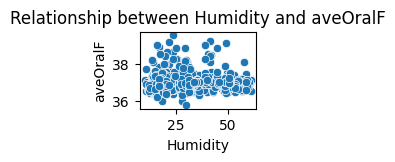

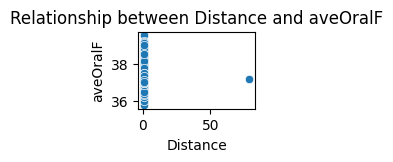

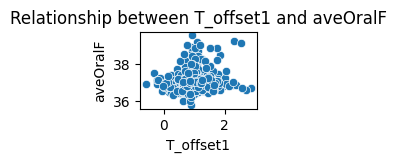

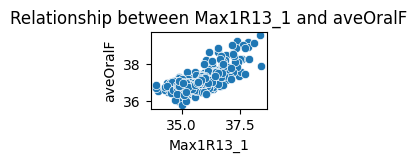

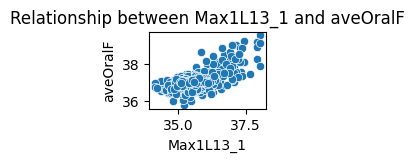

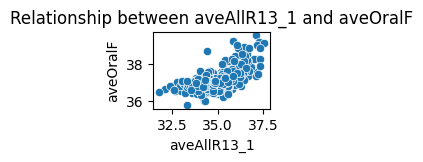

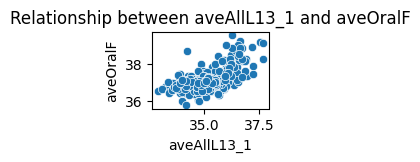

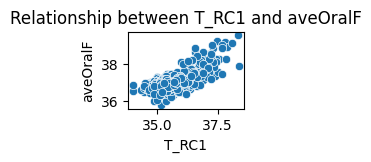

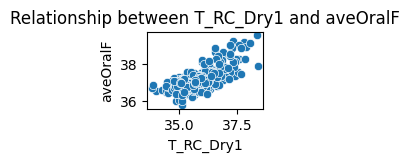

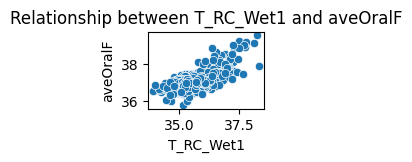

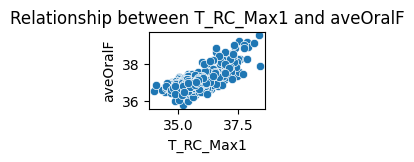

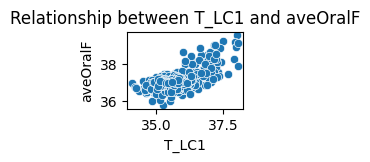

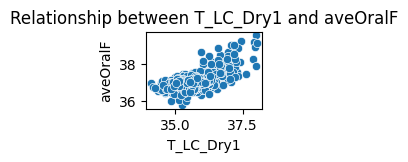

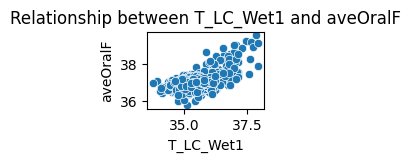

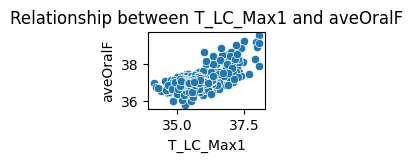

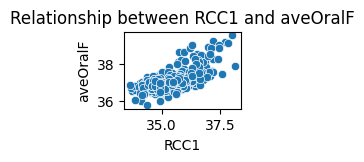

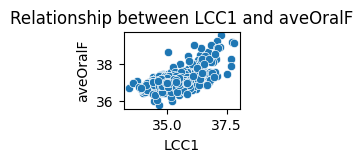

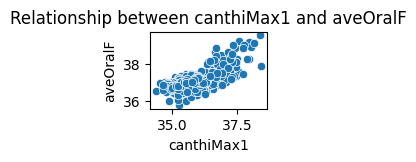

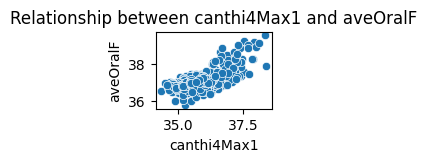

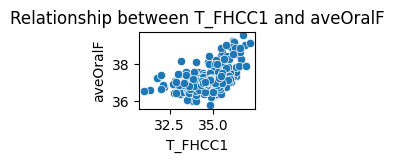

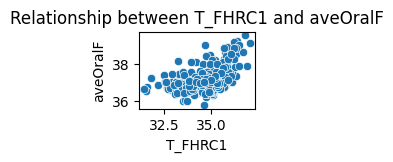

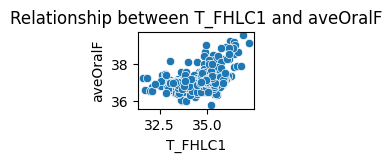

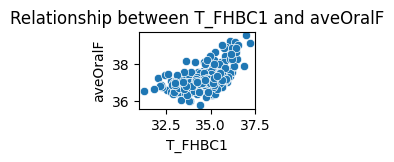

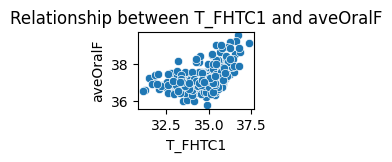

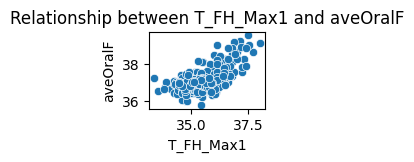

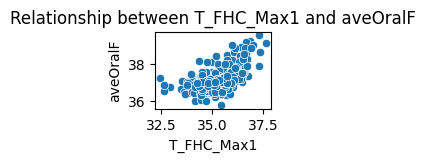

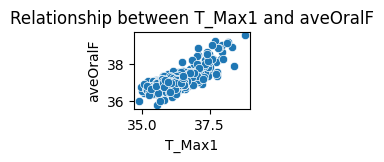

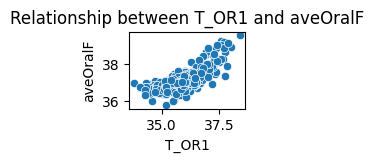

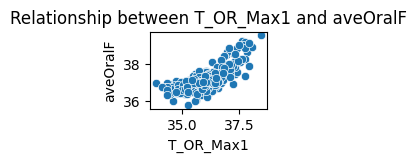

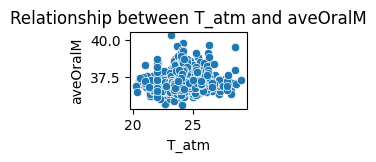

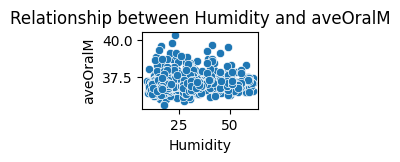

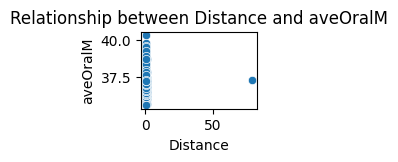

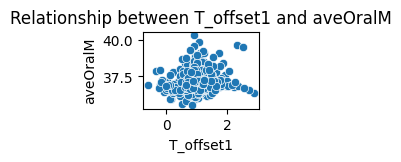

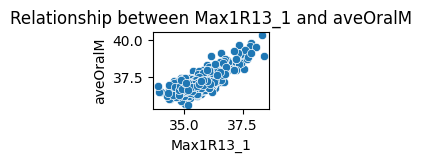

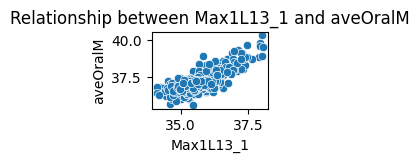

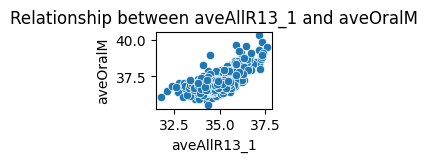

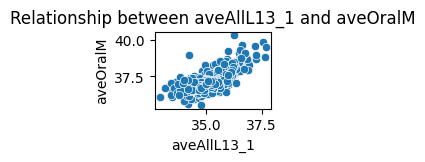

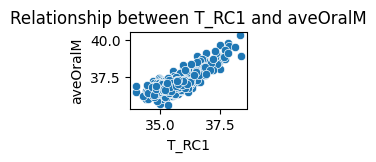

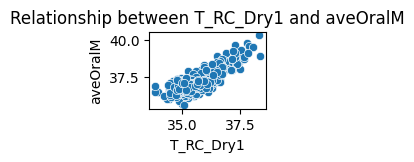

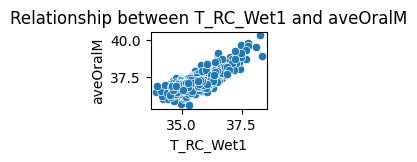

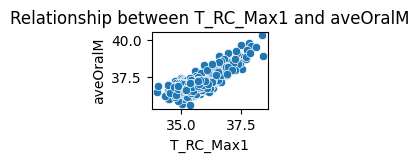

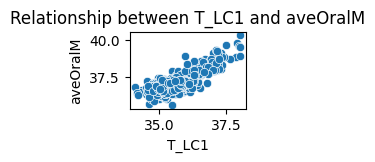

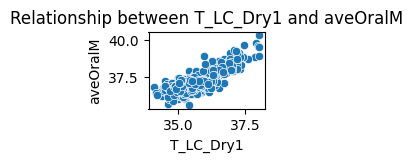

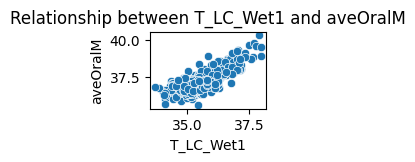

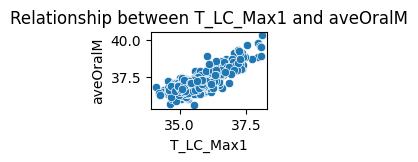

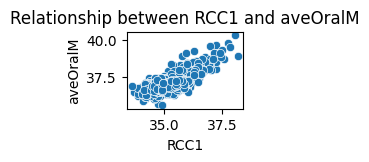

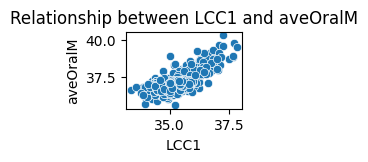

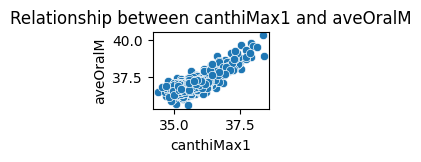

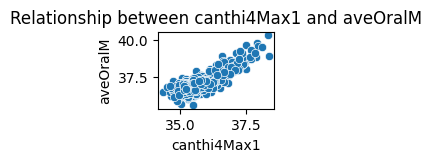

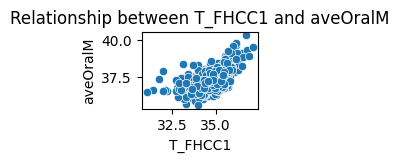

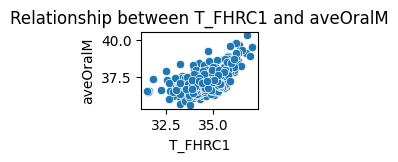

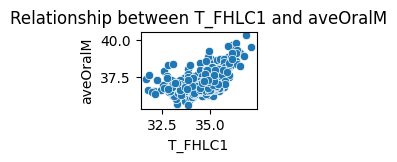

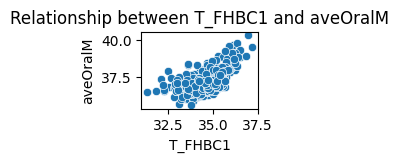

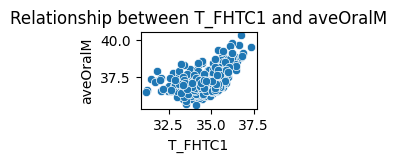

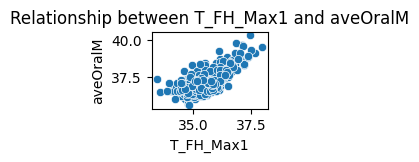

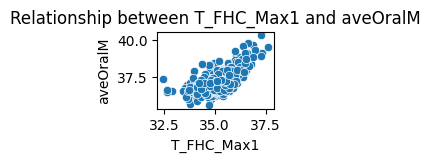

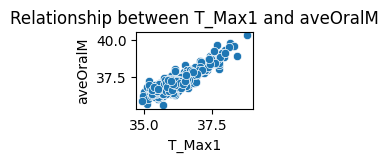

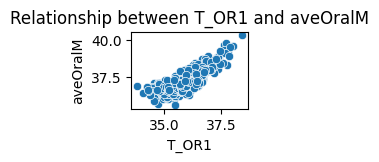

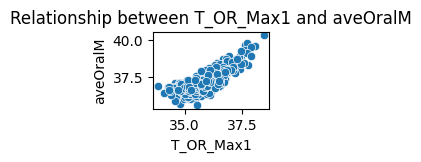

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relationships between features and target variables
def plot_feature_target_relationships(data, targets):
    num_features = data.select_dtypes(include=['float64', 'int64']).columns
    for target in targets.columns:
        for feature in num_features:
            plt.figure(figsize=(1.5, 1))  # Adjusted figure size to be smaller
            sns.scatterplot(x=data[feature], y=targets[target])
            plt.title(f'Relationship between {feature} and {target}')
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.show()

plot_feature_target_relationships(X, y)


# Encode Categorical Variables

Encode categorical features (Gender, Age, Ethnicity) to numeric format

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

X_encoded = X.copy()

# Encode 'gender' column
X_encoded['Gender'] = label_encoder.fit_transform(X_encoded['Gender'])

# # Encode 'ethnicity' column
X_encoded['Ethnicity'] = label_encoder.fit_transform(X_encoded['Ethnicity'])

# # Encode 'Age' column
X_encoded['Age'] = label_encoder.fit_transform(X_encoded['Age'])

# Print the first few rows to check the encoding
X_encoded.head()


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,1,5,5,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,0,4,2,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,0,2,5,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,0,2,2,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,1,0,5,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


# Split Data

Seperate data training : testing = 8 : 2 to evaluate the performance of the model on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((816, 33), (204, 33), (816, 2), (204, 2))



---



# 4. Model Selection & Training

# 4-1. Regression

Linear Regression

Polynomial Regression

Neural Network Regression

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

{"Linear Regression": {"MSE": mse_lr, "R2": r2_lr}}

{'Linear Regression': {'MSE': 0.054744818792531416, 'R2': 0.639212834164131}}

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Initialize and train the Polynomial Regression model
poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

{"Polynomial Regression": {"MSE": mse_poly, "R2": r2_poly}}

{'Polynomial Regression': {'MSE': 0.5372833272704987,
  'R2': -2.5775001113034204}}

# Neural Network Regression

In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

{"Neural Network Regression": {"MSE": mse_nn, "R2": r2_nn}}

{'Neural Network Regression': {'MSE': 0.1605603545785701,
  'R2': -0.05692197098437535}}



---



# 4-2. Classification

K-Nearest Neighbors (KNN)

Random Forest Classifier

Gradient Boosting Classifier

y_train_class and y_test_class variables are in a 2D array format with two columns (aveOralF and aveOralM).

Need to train and evaluate the model separately for aveOralF and aveOralM.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create binary target variables for fever prediction
y_train_class = (y_train >= 37.5).astype(int)
y_test_class = (y_test >= 37.5).astype(int)

# K-Nearest Neighbors (KNN) for aveOralF

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors (k-NN) for aveOralF
knn_model_aveOralF = KNeighborsClassifier(n_neighbors=5)
knn_model_aveOralF.fit(X_train, y_train_class['aveOralF'])

# Make predictions
y_pred_knn_aveOralF = knn_model_aveOralF.predict(X_test)
y_pred_knn_proba_aveOralF = knn_model_aveOralF.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_knn_aveOralF = accuracy_score(y_test_class['aveOralF'], y_pred_knn_aveOralF)
precision_knn_aveOralF = precision_score(y_test_class['aveOralF'], y_pred_knn_aveOralF)
recall_knn_aveOralF = recall_score(y_test_class['aveOralF'], y_pred_knn_aveOralF)
f1_knn_aveOralF = f1_score(y_test_class['aveOralF'], y_pred_knn_aveOralF)

accuracy_knn_aveOralF, precision_knn_aveOralF, recall_knn_aveOralF, f1_knn_aveOralF

(0.9607843137254902,
 0.7777777777777778,
 0.5384615384615384,
 0.6363636363636364)

# K-Nearest Neighbors (KNN) for aveOralM

In [ ]:
# k-Nearest Neighbors (k-NN) for aveOralM
knn_model_aveOralM = KNeighborsClassifier(n_neighbors=5)
knn_model_aveOralM.fit(X_train, y_train_class['aveOralM'])

# Make predictions
y_pred_knn_aveOralM = knn_model_aveOralM.predict(X_test)
y_pred_knn_proba_aveOralM = knn_model_aveOralM.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_knn_aveOralM = accuracy_score(y_test_class['aveOralM'], y_pred_knn_aveOralM)
precision_knn_aveOralM = precision_score(y_test_class['aveOralM'], y_pred_knn_aveOralM)
recall_knn_aveOralM = recall_score(y_test_class['aveOralM'], y_pred_knn_aveOralM)
f1_knn_aveOralM = f1_score(y_test_class['aveOralM'], y_pred_knn_aveOralM)

accuracy_knn_aveOralM, precision_knn_aveOralM, recall_knn_aveOralM, f1_knn_aveOralM

(0.9362745098039216, 1.0, 0.4583333333333333, 0.6285714285714286)

# Random Forest Classifier for aveOralF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train the Random Forest model
rf_model_aveOralF = RandomForestClassifier(random_state=42)
rf_model_aveOralF.fit(X_train, y_train_class['aveOralF'])

# Make predictions
y_pred_rf_aveOralF = rf_model_aveOralF.predict(X_test)
y_pred_rf_proba_aveOralF = rf_model_aveOralF.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf_aveOralF = accuracy_score(y_test_class['aveOralF'], y_pred_rf_aveOralF)
precision_rf_aveOralF = precision_score(y_test_class['aveOralF'], y_pred_rf_aveOralF)
recall_rf_aveOralF = recall_score(y_test_class['aveOralF'], y_pred_rf_aveOralF)
f1_rf_aveOralF = f1_score(y_test_class['aveOralF'], y_pred_rf_aveOralF)

accuracy_rf_aveOralF, precision_rf_aveOralF, recall_rf_aveOralF, f1_rf_aveOralF

(0.9705882352941176,
 0.8181818181818182,
 0.6923076923076923,
 0.7500000000000001)

# Random Forest Classifier for aveOralM

In [ ]:
# Initialize and train the Random Forest model
rf_model_aveOralM = RandomForestClassifier(random_state=42)
rf_model_aveOralM.fit(X_train, y_train_class['aveOralM'])

# Make predictions
y_pred_rf_aveOralM = rf_model_aveOralM.predict(X_test)
y_pred_rf_proba_aveOralM = rf_model_aveOralM.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf_aveOralM = accuracy_score(y_test_class['aveOralM'], y_pred_rf_aveOralM)
precision_rf_aveOralM = precision_score(y_test_class['aveOralM'], y_pred_rf_aveOralM)
recall_rf_aveOralM = recall_score(y_test_class['aveOralM'], y_pred_rf_aveOralM)
f1_rf_aveOralM = f1_score(y_test_class['aveOralM'], y_pred_rf_aveOralM)

accuracy_rf_aveOralM, precision_rf_aveOralM, recall_rf_aveOralM, f1_rf_aveOralM

(0.9607843137254902,
 0.8636363636363636,
 0.7916666666666666,
 0.8260869565217391)

# Gradient Boosting Classifier for aveOralF

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier for aveOralF
gb_model_aveOralF = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_aveOralF.fit(X_train, y_train_class['aveOralF'])

# Make predictions
y_pred_gb_aveOralF = gb_model_aveOralF.predict(X_test)
y_pred_gb_proba_aveOralF = gb_model_aveOralF.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_gb_aveOralF = accuracy_score(y_test_class['aveOralF'], y_pred_gb_aveOralF)
precision_gb_aveOralF = precision_score(y_test_class['aveOralF'], y_pred_gb_aveOralF)
recall_gb_aveOralF = recall_score(y_test_class['aveOralF'], y_pred_gb_aveOralF)
f1_gb_aveOralF = f1_score(y_test_class['aveOralF'], y_pred_gb_aveOralF)

accuracy_gb_aveOralF, precision_gb_aveOralF, recall_gb_aveOralF, f1_gb_aveOralF

(0.9754901960784313, 0.8333333333333334, 0.7692307692307693, 0.8)

# Gradient Boosting Classifier for aveOralM

In [ ]:
# Gradient Boosting Classifier for aveOralM
gb_model_aveOralM = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_aveOralM.fit(X_train, y_train_class['aveOralM'])

# Make predictions
y_pred_gb_aveOralM = gb_model_aveOralM.predict(X_test)
y_pred_gb_proba_aveOralM = gb_model_aveOralM.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_gb_aveOralM = accuracy_score(y_test_class['aveOralM'], y_pred_gb_aveOralM)
precision_gb_aveOralM = precision_score(y_test_class['aveOralM'], y_pred_gb_aveOralM)
recall_gb_aveOralM = recall_score(y_test_class['aveOralM'], y_pred_gb_aveOralM)
f1_gb_aveOralM = f1_score(y_test_class['aveOralM'], y_pred_gb_aveOralM)

accuracy_gb_aveOralM, precision_gb_aveOralM, recall_gb_aveOralM, f1_gb_aveOralM

(0.9656862745098039, 0.84, 0.875, 0.8571428571428572)



---



# 5. Evaluation

# Regression Model Performance Metrics


**Mean Squared Error (MSE)**

Lower MSE indicate better model performance as they suggest smaller errors. It's sensitive to outliers since errors are squared.

**R-squared (R²)**

 R² indicate how well the independent variables explain the variability of the dependent variable. An R² of 1 indicates perfect prediction, 0 indicates that the model does not explain any variability, and negative values indicate that the model performs worse than a horizontal line (mean model).

In [ ]:
# Results
{
    "Linear Regression": {"MSE": mse_lr, "R2": r2_lr},
    "Polynomial Regression": {"MSE": mse_poly, "R2": r2_poly},
    "Neural Network Regression": {"MSE": mse_nn, "R2": r2_nn}
}

{'Linear Regression': {'MSE': 0.054744818792531416, 'R2': 0.639212834164131},
 'Polynomial Regression': {'MSE': 0.5372833272704987,
  'R2': -2.5775001113034204},
 'Neural Network Regression': {'MSE': 0.1605603545785701,
  'R2': -0.05692197098437535}}

# Linear Regression > Neural Network Regression > Polynomial Regression

**Linear Regression**

Test performing model among the three. It has the lowest MSE and a positive R², indicating a good balance between bias and variance.

**Polynomial Regression**

Worst performance with a high MSE and a significantly negative R² which is a strong indicator of overfitting or an inappropriate polynomial degree for the given data.

**Neural Network Regression**

Intermediate performance. While it has a higher MSE compared to Linear Regression, it performs better than Polynomial Regression. However, its slightly negative R² indicates that it does not capture the data variance well, potentially due to underfitting or inadequate training.


---



# Classification Model Performance Metrics


**Accuracy**

The overall correctness of the model, but it can be misleading in imbalanced datasets if the majority class dominates.

**Precision**

Indicates how many of the predicted positive cases are actually positive. High precision means low false positive rate.

**Recall**

Measures how many actual positive cases were correctly identified. High recall means low false negative rate.

**F1 Score**

Useful when the class distribution is imbalanced and provides a balance between precision and recall. Higher values indicate better model performance.

In [ ]:
# Results
{
    "K-Nearest Neighbors for aveOralF": {"Accuracy": accuracy_knn_aveOralF, "Precision": precision_knn_aveOralF, "Recall": recall_knn_aveOralF, "F1 Score": f1_knn_aveOralF},
    "K-Nearest Neighbors for aveOralM": {"Accuracy": accuracy_knn_aveOralM, "Precision": precision_knn_aveOralM, "Recall": recall_knn_aveOralM, "F1 Score": f1_knn_aveOralM  },
    "Random Forest Classifier for aveOralF": {"Accuracy": accuracy_rf_aveOralF, "Precision": precision_rf_aveOralF, "Recall": recall_rf_aveOralF, "F1 Score": recall_rf_aveOralF},
    "Random Forest Classifier for aveOralM": {"Accuracy": accuracy_rf_aveOralM, "Precision": precision_rf_aveOralM, "Recall": recall_rf_aveOralM, "F1 Score": f1_rf_aveOralM},
    "Gradient Boosting Classifier for aveOralF": {"Accuracy": accuracy_gb_aveOralF, "Precision": precision_gb_aveOralF, "Recall": recall_gb_aveOralF, "F1 Score": f1_gb_aveOralF},
    "Gradient Boosting Classifier for aveOralM": {"Accuracy": accuracy_gb_aveOralM, "Precision": precision_gb_aveOralM, "Recall": recall_gb_aveOralM, "F1 Score": f1_gb_aveOralM}
}

{'K-Nearest Neighbors for aveOralF': {'Accuracy': 0.9607843137254902,
  'Precision': 0.7777777777777778,
  'Recall': 0.5384615384615384,
  'F1 Score': 0.6363636363636364},
 'K-Nearest Neighbors for aveOralM': {'Accuracy': 0.9362745098039216,
  'Precision': 1.0,
  'Recall': 0.4583333333333333,
  'F1 Score': 0.6285714285714286},
 'Random Forest Classifier for aveOralF': {'Accuracy': 0.9705882352941176,
  'Precision': 0.8181818181818182,
  'Recall': 0.6923076923076923,
  'F1 Score': 0.6923076923076923},
 'Random Forest Classifier for aveOralM': {'Accuracy': 0.9607843137254902,
  'Precision': 0.8636363636363636,
  'Recall': 0.7916666666666666,
  'F1 Score': 0.8260869565217391},
 'Gradient Boosting Classifier for aveOralF': {'Accuracy': 0.9754901960784313,
  'Precision': 0.8333333333333334,
  'Recall': 0.7692307692307693,
  'F1 Score': 0.8},
 'Gradient Boosting Classifier for aveOralM': {'Accuracy': 0.9656862745098039,
  'Precision': 0.84,
  'Recall': 0.875,
  'F1 Score': 0.8571428571428572

# Gradient Boosting Classifier > Random Forest Classifier > K-Nearest Neighbors


**K-Nearest Neighbors (KNN)**

Shows high accuracy but lower recall and F1 scores, suggesting that while it correctly predicts the majority class, it struggles with identifying all positive cases, especially for aveOralM.

**Random Forest Classifier**

Performs well, particularly for aveOralM, with strong precision and recall, indicating a balanced model with good predictive power.

**Gradient Boosting Classifier**

Outperforms the other models for both aveOralF and aveOralM, achieving the highest accuracy, recall, and F1 scores. It is the most balanced and effective model for both targets.



---







# 6. Optimal Threshold

# Optimal Threshold for Classification Models

1. Random Forest model for aveOralF

2. Plot Precision-Recall Curve

3. Find the Optimal Threshold for Different Metrics

4. Evaluate and Plot ROC Curve



# Random Forest model for aveOralF with Default Threshold

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test_class['aveOralF'], y_pred_rf_proba_aveOralF)

# Plot Precision-Recall Tradeoff

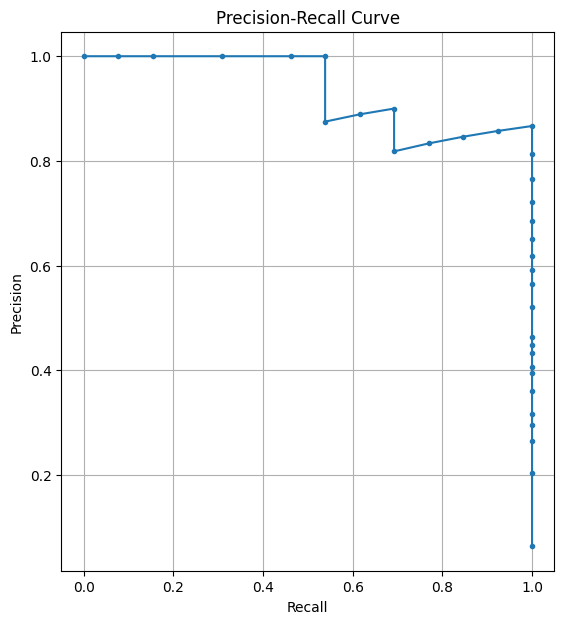

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall for Random Forest (aveOralF)
def plot_curves(y_test, y_pred_proba):
    # Precision-Recall curve
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)


    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid()

    plt.show()

    return precision, recall, thresholds_pr

# Get prediction probabilities
y_pred_proba_rf_aveOralF = rf_model_aveOralF.predict_proba(X_test)[:, 1]

# Plot curves
precision_rf, recall_rf, thresholds_rf = plot_curves(y_test_class['aveOralF'], y_pred_proba_rf_aveOralF)

# Find Optimal Threshold Point for Different Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


def evaluate_thresholds(y_true, y_pred_proba):
    thresholds = np.arange(0.0, 1.0, 0.01)
    metrics = {'threshold': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        metrics['threshold'].append(threshold)
        metrics['accuracy'].append(accuracy_score(y_true, y_pred))
        metrics['precision'].append(precision_score(y_true, y_pred))
        metrics['recall'].append(recall_score(y_true, y_pred))
        metrics['f1'].append(f1_score(y_true, y_pred))

    return pd.DataFrame(metrics)

metrics_df = evaluate_thresholds(y_test_class['aveOralF'], y_pred_rf_proba_aveOralF)
metrics_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

,threshold,accuracy,precision,recall,f1
0,0.00,0.063725,0.063725,1.0,0.119816
1,0.01,0.750000,0.203125,1.0,0.337662
2,0.02,0.823529,0.265306,1.0,0.419355
3,0.03,0.848039,0.295455,1.0,0.456140
4,0.04,0.862745,0.317073,1.0,0.481481


In [ ]:
optimal_thresholds = {
    'accuracy': metrics_df.loc[metrics_df['accuracy'].idxmax()],
    'precision': metrics_df.loc[metrics_df['precision'].idxmax()],
    'recall': metrics_df.loc[metrics_df['recall'].idxmax()],
    'f1': metrics_df.loc[metrics_df['f1'].idxmax()]
}

optimal_thresholds


{'accuracy': threshold    0.350000
 accuracy     0.990196
 precision    0.866667
 recall       1.000000
 f1           0.928571
 Name: 35, dtype: float64,
 'precision': threshold    0.640000
 accuracy     0.970588
 precision    1.000000
 recall       0.538462
 f1           0.700000
 Name: 64, dtype: float64,
 'recall': threshold    0.000000
 accuracy     0.063725
 precision    0.063725
 recall       1.000000
 f1           0.119816
 Name: 0, dtype: float64,
 'f1': threshold    0.350000
 accuracy     0.990196
 precision    0.866667
 recall       1.000000
 f1           0.928571
 Name: 35, dtype: float64}

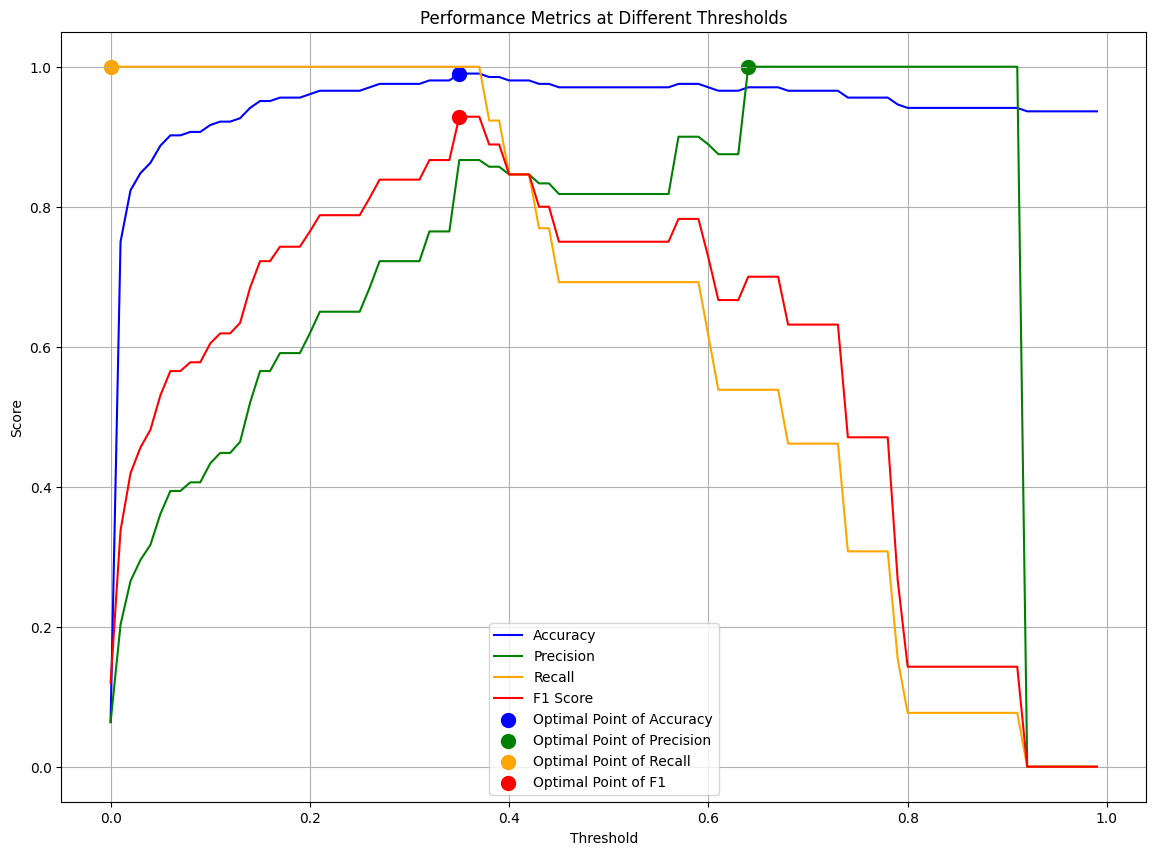

In [ ]:
plt.figure(figsize=(14, 10))

# Plot accuracy, precision, recall, and f1 score
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], label='Accuracy', color='blue')
plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', color='green')
plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', color='orange')
plt.plot(metrics_df['threshold'], metrics_df['f1'], label='F1 Score', color='red')

# Mark optimal points
for metric, color in zip(['accuracy', 'precision', 'recall', 'f1'], ['blue', 'green', 'orange', 'red']):
    plt.scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric][metric], color=color, s=100, label=f'Optimal Point of {metric.capitalize()}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics at Different Thresholds')
plt.legend()
plt.grid()
plt.show()


# Interpretation

Optimal Threshold for F1 Score and Accuracy

 Provides the best overall performance with high accuracy, precision, recall, and F1 score, indicating a well-balanced model.

Optimal Threshold for Precision:

Ensures no false positives but misses a significant number of true positives, resulting in lower recall and a moderate F1 score.

Optimal Threshold for Recall:

 Identifies all actual positives but at the cost of very low precision and accuracy, leading to poor overall performance.

---




 Optimal Threshold for F1 Score, Max F1 : (0.35, 0.93)

Optimal Threshold for Precision, Max Precision : (0.67, 1.0)

Optimal Threshold for Recall, Max Recall : (0, 1)

Optimal Threshold for Accuracy, Max Acurracy (0.35, 0.99)

# Evaluate and Plot ROC Curve


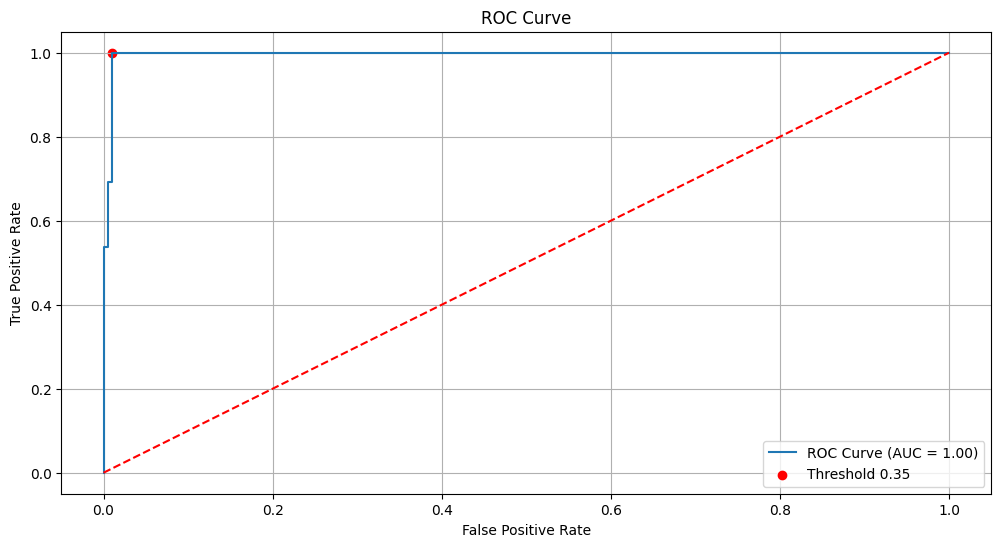

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds_roc = roc_curve(y_test_class['aveOralF'], y_pred_rf_proba_aveOralF)
auc_roc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
plt.scatter(fpr[np.argmin(abs(thresholds_roc - 0.37))], tpr[np.argmin(abs(thresholds_roc - 0.35))], color='red', label='Threshold 0.35')  # Point at threshold 0.35
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


ROC AUC (Receiver Operating Characteristic Area Under the Curve)

 AUC measures the area under the ROC curve, which plots the true positive rate (recall) against the false positive rate.

 A model with an AUC of 1 indicates perfect prediction, while an AUC of 0.5 suggests random guessing.

 AOC of the Random Forest model for aveOralF is almost 1 where the threshold = 0.35 which indicates perfect prediction.

---




# 7. Feature Importance

# Linear Regression

Extract Feature Importance Scores

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train['aveOralF'])

# Extract coefficients as feature importance
feature_importances_lr = lr_model.coef_

# Create a DataFrame for visualization
importance_df_lr = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importance': feature_importances_lr
}).sort_values(by='Importance', ascending=False)

importance_df_lr


,Feature,Importance
31,T_OR1,0.846736
15,T_LC1,0.553297
21,canthiMax1,0.410689
30,T_Max1,0.288051
14,T_RC_Max1,0.235961
12,T_RC_Dry1,0.186247
28,T_FH_Max1,0.172766
26,T_FHBC1,0.129971
20,LCC1,0.060673
6,T_offset1,0.047335


**Visualisation**

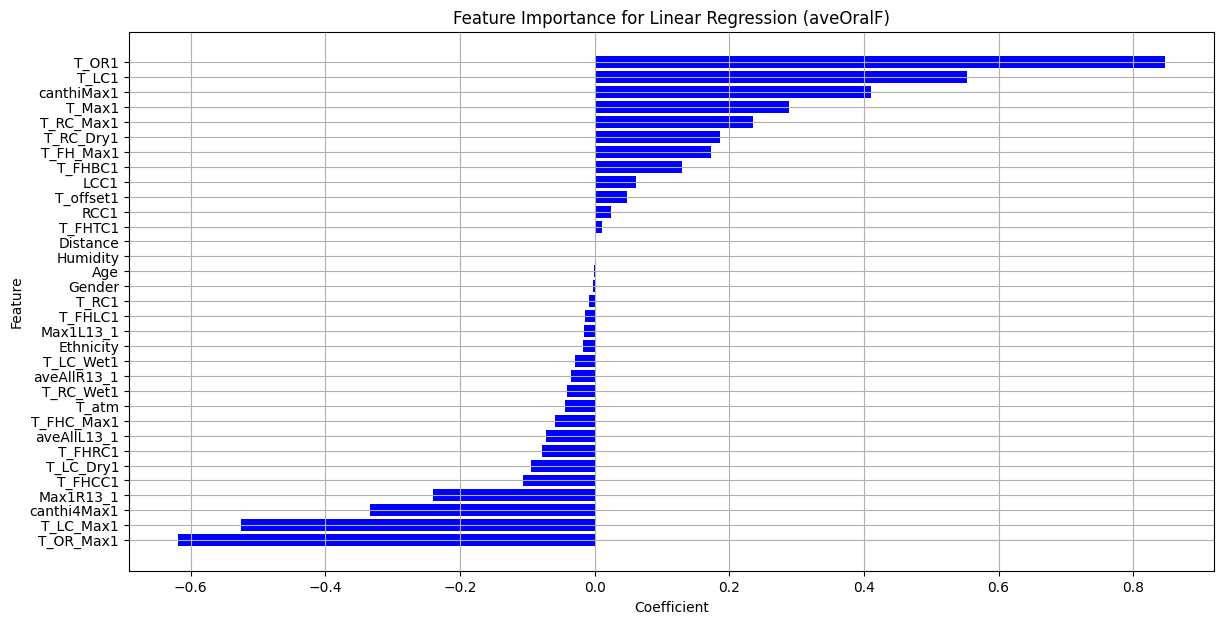

In [ ]:
# Plot feature importance for Linear Regression
plt.figure(figsize=(14, 7))
plt.barh(importance_df_lr['Feature'], importance_df_lr['Importance'], color='b')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression (aveOralF)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# Feature Importance of Linear Regression



The bar plot above shows the coefficients of each feature for the Linear Regression model predicting aveOralF. Positive coefficients indicate that an increase in the feature value is associated with an increase in the predicted oral temperature, while negative coefficients indicate the opposite.


---


Features with highest coefficient Top 3

T_OR1: Average temperature of the highest four pixels within the mouth region.

T_LC1: Average temperature of the highest four pixels in a square of 24x24 pixels around the left canthus, with 2/3 toward the face center (dry area, 16x24 pixels) and 1/3 away from the face center (wet area, 8x24 pixels).

canthiMax1: Max value in the extended canthi area


# Random Forest

Extract Feature Importance Scores

In [ ]:
# Extract feature importance scores
feature_importances = rf_model_aveOralF.feature_importances_

# Get feature names
feature_names = X.columns.tolist()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
32,T_OR_Max1,0.112334
30,T_Max1,0.103256
13,T_RC_Wet1,0.081042
11,T_RC1,0.058403
31,T_OR1,0.052852
21,canthiMax1,0.051925
14,T_RC_Max1,0.048708
22,canthi4Max1,0.043855
12,T_RC_Dry1,0.041342
16,T_LC_Dry1,0.038720


**Visualisation**


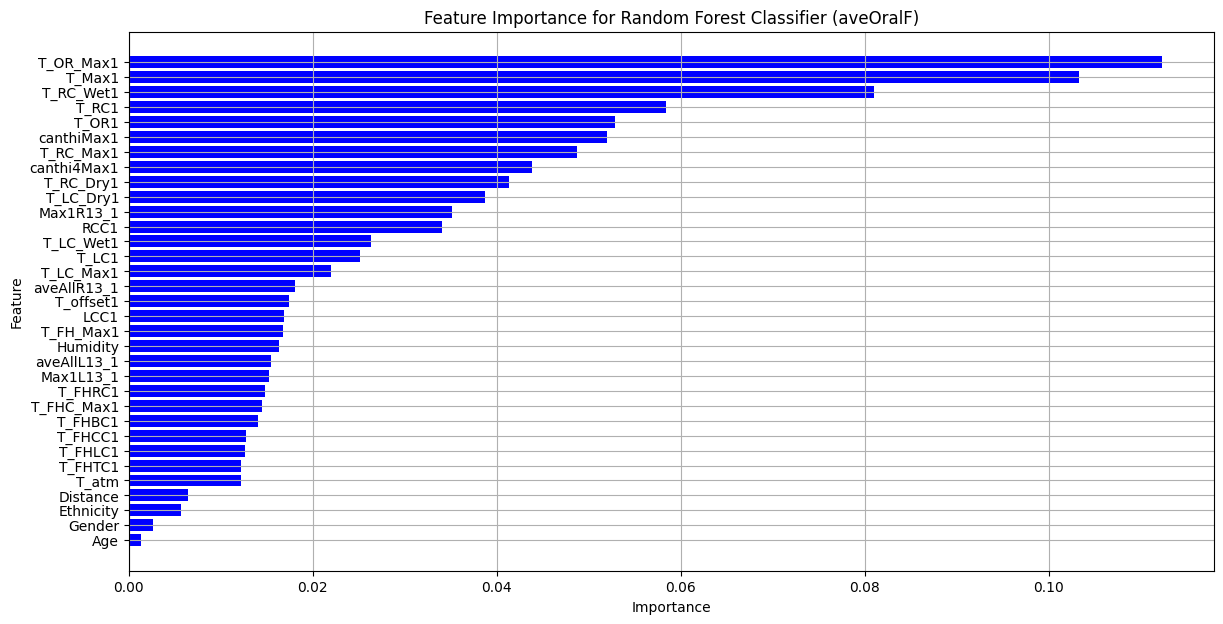

In [ ]:
# Plot feature importance
plt.figure(figsize=(14, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Classifier (aveOralF)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


# Feature Importance of Linear Regression

The bar plot above shows the importance of each feature for the Random Forest classifier predicting aveOralF.


---



Features with highest coefficient Top 3

T_OR_Max1: Maximum temperature within the mouth region.

T_Max1: Maximum temperature within the whole face region.

T_RC_Wet1: Average temperature of the highest four pixels in the right canthus wet area, a rectangle of 8x24 pixels.



# 8. Conclusion

These machine learning models were able to predict oral temperatures and detect fever conditions using infrared thermography data. This technology shows great promise for providing non-invasive, fast body temperature screening, particularly in the clinical setting and during pandemics.

 As future work, it should be tested on a larger data-set, the models can be improved with ensemble methods, and additional features can be added, each of which is likely to increase prediction accuracy and robustness. With this study, we hope to contribute to this current research trend of employing machine learning for better healthcare diagnoses.